#  Programming Assignment 1
* Author: Shreya Dubey 

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import pickle

Using TensorFlow backend.


In [2]:
# loading data
dataset = pd.read_csv("dataset.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 13 columns):
CustomerId         9000 non-null int64
Surname            9000 non-null object
CreditScore        9000 non-null int64
Geography          9000 non-null object
Gender             9000 non-null object
Age                9000 non-null int64
Tenure             9000 non-null int64
Balance            9000 non-null float64
NumOfProducts      9000 non-null int64
HasCrCard          9000 non-null int64
IsActiveMember     9000 non-null int64
EstimatedSalary    9000 non-null float64
Exited             9000 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 914.1+ KB


Exited             1.000000
Age                0.283791
IsActiveMember     0.158099
Balance            0.114812
NumOfProducts      0.048373
CreditScore        0.024658
Tenure             0.014703
EstimatedSalary    0.008938
CustomerId         0.006518
HasCrCard          0.001705
Name: Exited, dtype: float64


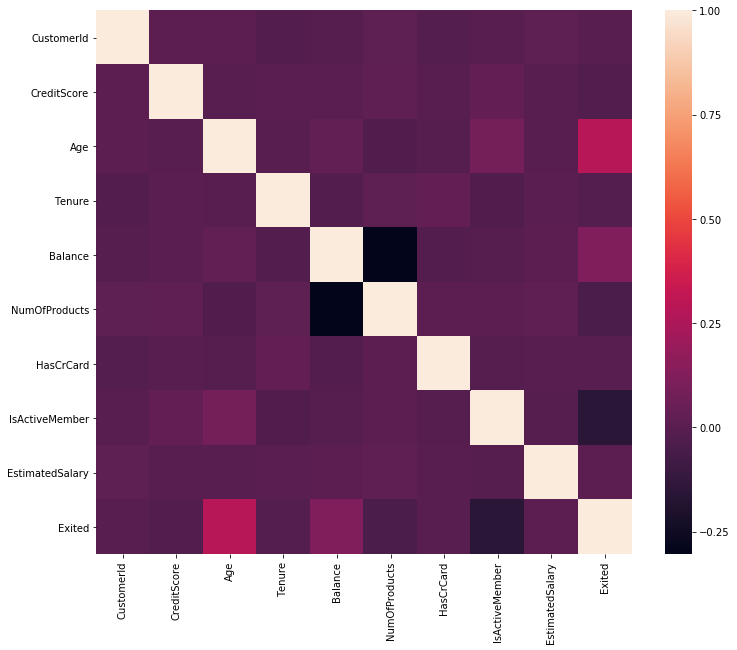

In [3]:
corr_matrix = dataset.corr()
corr_abs = corr_matrix.abs()
print(corr_abs['Exited'].sort_values(ascending=False))

plt.figure(figsize = (12,10))

#plot heatmap 
sns.heatmap(corr_matrix, xticklabels = corr_matrix.columns.values, yticklabels=corr_matrix.columns.values)

In [4]:
# Dropping less important featurs
dataset = dataset.drop(['CustomerId','Surname'],axis=1)

In [5]:
# Coverting categorical values to numerical
geo_encoded = pd.get_dummies(dataset['Geography'])
gen_encoded = pd.get_dummies(dataset['Gender'])

dataset = pd.concat([dataset,geo_encoded],axis=1)
dataset = pd.concat([dataset,gen_encoded],axis=1)

dataset = dataset.drop(['Geography','Gender'],axis=1)

In [6]:
dataset

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,504,34,0,54980.81,1,1,1,136909.88,0,0,0,1,0,1
1,659,33,7,89939.62,1,1,0,136540.09,0,1,0,0,1,0
2,473,32,5,146602.25,2,1,1,72946.95,0,0,1,0,1,0
3,637,40,6,0.00,2,1,1,181610.60,0,0,0,1,1,0
4,657,75,7,126273.95,1,0,1,91673.60,0,0,0,1,0,1
5,629,49,4,0.00,2,1,1,196335.48,0,1,0,0,1,0
6,749,36,7,0.00,2,0,0,80134.65,0,0,0,1,0,1
7,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
8,692,36,3,0.00,2,1,1,8282.22,0,1,0,0,1,0
9,614,27,9,106414.57,2,0,0,77500.81,0,1,0,0,1,0


In [7]:
# Splitting the data into test and train
train_set, test_set = train_test_split(dataset, test_size=0.20 )

train_Y = train_set['Exited']
test_Y = test_set['Exited']
train_X = train_set.drop(['Exited'],axis=1)
test_X = test_set.drop(['Exited'],axis=1)

train_Y = train_Y.values
train_X = train_X.values
test_X = test_X.values
test_Y =test_Y.values

print(train_set.shape)
print(train_X.shape)

(7200, 14)
(7200, 13)


In [8]:
# normalizing the data
scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

# adding bias to the input
ones = np.ones([train_X.shape[0],1])
train_X = np.concatenate((ones,train_X),axis=1)

ones = np.ones([test_X.shape[0],1])
test_X = np.concatenate((ones,test_X),axis=1)

In [9]:
train_X.shape

(7200, 14)

In [10]:
# creating the model
model = Sequential()
model.add(Dense(output_dim=11, input_dim=14, activation='relu'))
model.add(Dense(output_dim=9, activation='relu'))
model.add(Dense(output_dim=7, activation='relu'))
model.add(Dense(output_dim=5, activation='sigmoid'))
model.add(Dense(output_dim=3, activation='sigmoid'))
model.add(Dense(output_dim=1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\khare\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=14, activation="relu", units=11)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\khare\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=9)`
  after removing the cwd from sys.path.
C:\Users\khare\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=7)`
  """
C:\Users\khare\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=5)`
  
C:\Users\khare\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=3)`
  import sys
C:\Users\khare\Anaconda3\

In [11]:
# training the model on training data
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_X,train_Y, epochs=150, batch_size=20)


Instructions for updating:
Use tf.cast instead.
Epoch 1/150
7200/7200 [==============================] - 1s 184us/step - loss: 0.7062 - acc: 0.5263
Epoch 2/150
7200/7200 [==============================] - 0s 67us/step - loss: 0.5339 - acc: 0.7982
Epoch 3/150
7200/7200 [==============================] - 1s 76us/step - loss: 0.5093 - acc: 0.7982
Epoch 4/150
7200/7200 [==============================] - 1s 79us/step - loss: 0.5041 - acc: 0.7982
Epoch 5/150
7200/7200 [==============================] - 1s 70us/step - loss: 0.5031 - acc: 0.7982
Epoch 6/150
7200/7200 [==============================] - 0s 69us/step - loss: 0.5025 - acc: 0.7982
Epoch 7/150
7200/7200 [==============================] - 0s 68us/step - loss: 0.4882 - acc: 0.7982
Epoch 8/150
7200/7200 [==============================] - 1s 70us/step - loss: 0.4677 - acc: 0.7982
Epoch 9/150
7200/7200 [==============================] - 0s 68us/step - loss: 0.4580 - acc: 0.7982
Epoch 10/150
7200/7200 [==============================] - 0s

7200/7200 [==============================] - 0s 66us/step - loss: 0.3631 - acc: 0.8583
Epoch 80/150
7200/7200 [==============================] - 0s 67us/step - loss: 0.3624 - acc: 0.8585
Epoch 81/150
7200/7200 [==============================] - 0s 64us/step - loss: 0.3627 - acc: 0.8571
Epoch 82/150
7200/7200 [==============================] - 0s 65us/step - loss: 0.3618 - acc: 0.8603
Epoch 83/150
7200/7200 [==============================] - 0s 66us/step - loss: 0.3601 - acc: 0.8601
Epoch 84/150
7200/7200 [==============================] - 0s 68us/step - loss: 0.3599 - acc: 0.8594
Epoch 85/150
7200/7200 [==============================] - 0s 66us/step - loss: 0.3604 - acc: 0.8592
Epoch 86/150
7200/7200 [==============================] - 1s 70us/step - loss: 0.3601 - acc: 0.8585
Epoch 87/150
7200/7200 [==============================] - 0s 67us/step - loss: 0.3587 - acc: 0.8604
Epoch 88/150
7200/7200 [==============================] - 0s 67us/step - loss: 0.3589 - acc: 0.8597
Epoch 89/150


In [12]:
# Prediction on training data
train_Y_pred = model.predict_classes(train_X)
print("Accuracy = ",metrics.accuracy_score(train_Y,train_Y_pred))
print("Precision = ",metrics.precision_score(train_Y,train_Y_pred))
print("Recall = ",metrics.recall_score(train_Y,train_Y_pred))
print("F1 score = ",metrics.f1_score(train_Y,train_Y_pred))

Accuracy =  0.8625
Precision =  0.7657864523536165
Recall =  0.459050240880936
F1 score =  0.5740103270223752


In [13]:
# Prediction on test data
test_Y_pred = model.predict_classes(test_X)
print("Accuracy = ",metrics.accuracy_score(test_Y,test_Y_pred))
print("Precision = ",metrics.precision_score(test_Y,test_Y_pred))
print("Recall = ",metrics.recall_score(test_Y,test_Y_pred))
print("F1 score = ",metrics.f1_score(test_Y,test_Y_pred))

Accuracy =  0.8527777777777777
Precision =  0.7652582159624414
Recall =  0.4312169312169312
F1 score =  0.5516074450084602


In [14]:
# saving the trained model
filename = 'final_model.sav'
pickle.dump(model, open(filename,'wb'))